# KNN vs Random Forest

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
def write_answer(number, accuracy):
    answer = str(1-accuracy)
    with open(f"answer-{number}.txt", 'w') as file:
        file.write(answer)

## Load data

In [3]:
data, target = load_digits(return_X_y=True)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25, shuffle=False)

Text(0.5, 1.0, 'Targer: 0')

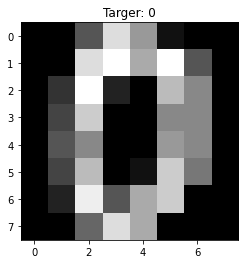

In [5]:
plt.imshow(data[0,:].reshape((8,8)), cmap='gray')
plt.title(f"Targer: {target[0]}")

## KNN implementation

In [6]:
class KNN:
    def __init__(self, distance_func, k = 1):
        self._k = k       
        self._fdist = distance_func
       
    def fit(self, x, y):
        self._x = x
        self._y = y
    
    def predict(self, x):
        if x.ndim == 2:
            results = np.empty(shape=(x.shape[0],))
            for i in range(x.shape[0]):
                results[i] = self._predict_one(x[i,:])
            return results
        elif x.ndim == 1:
            return self._predict_one(x)
        
    def _predict_one(self, x):
        distances = np.empty(shape=(self._x.shape[0],))
        for i in range(self._x.shape[0]):
            distances[i] = self._fdist(self._x[i,:], x)
            
        nearest_indexes = np.argpartition(distances, self._k)[:self._k]
        un_target, un_counts = np.unique(self._y[nearest_indexes], return_counts=True)
        return un_target[np.argmax(un_counts)]

In [7]:
def squared_distance(a, b):
    return np.linalg.norm(a-b)

## Train KNN

In [8]:
knn = KNN(squared_distance)
knn.fit(x_train, y_train)

In [9]:
knn_accuracy = accuracy_score(y_test, knn.predict(x_test))
print(f"KNN accuracy: {knn_accuracy}")

KNN accuracy: 0.9622222222222222


In [10]:
write_answer(1, knn_accuracy)

## Train Random Forest

In [11]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
rf_accuracy = accuracy_score(y_test, rf.predict(x_test))
print(f"Random forest accuracy: {rf_accuracy}")

Random forest accuracy: 0.9333333333333333


In [13]:
write_answer(2, rf_accuracy)